In [1]:
import json
import numpy as np
# import wavio
# from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import wave
import struct

In [3]:
with open('/Users/dmartins/Desktop/spikeT_13_to_16.json', 'r') as f:
    spikeT = json.load(f)
n_units = len(spikeT.keys())

with open('/Users/dmartins/Desktop/saccT_13_to_16.json', 'r') as f:
    saccT = json.load(f)
    
modinds = np.load('/Users/dmartins/Desktop/demo_modinds.npy')

In [41]:
fr = np.load('/Users/dmartins/Desktop/demo_fr.npy')

In [4]:
def note_to_freq(n):
    freq = 2 ** ((n-49)/12)
    return freq * 440 # Hz

# all cells

## select cells that are strongly responsive

In [38]:
usecells = np.argwhere(modinds>0.5).flatten()
len(usecells)

48

In [52]:
usecells = np.argwhere((fr>1)*(fr<3)).flatten()
len(usecells)

38

## spikes

In [72]:
n = 38
note_to_freq(((n+1)*2))

2349.31814333926

In [73]:
framerate = 30000
tlen = 3 # sec
t = np.linspace(0, tlen, int(tlen*framerate), endpoint=True)
sp_len = int(framerate*(30/1000)) # play each spike sound for 5 ms
tone_t = np.arange(0, sp_len)

sinlist = []

count = 0
for ind, sps in spikeT.items():
    # spike the units w/ odd numbers
    if int(ind) not in usecells:
        continue
    count += 1
    
    freq = note_to_freq(((count+1)*2))
    
    tone = np.sin(2*np.pi * freq * tone_t)
    
    x = np.zeros(np.size(t))
    
    for sp in sps:
        t_on = int(sp*framerate)
        t_off = int((sp*framerate)+sp_len)
        if t_off < np.size(x):
            x[t_on:t_off] = tone
    
    sinlist.append(x)

In [74]:
framerate = 30000
tlen = 3 # sec
t = np.linspace(0, tlen, int(tlen*framerate), endpoint=True)
sp_len = int(framerate*(30/1000))
tone_t = np.arange(0, sp_len)

freq = note_to_freq(80)

tone = 3 * np.sin(2*np.pi * freq * tone_t)

x = np.zeros(np.size(t))

for s in saccT['gazeshift']:
    t_on = int(s*framerate)
    t_off = int((s*framerate)+sp_len)
    if t_off < np.size(x):
        x[t_on:t_off] = tone

In [75]:
fname = '/Users/dmartins/Desktop/spikes_byFr.wav'
wav_file = wave.open(fname, "w")

nchannels = 1
sampwidth = 2
nframes = np.size(t)
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, int(framerate/4), nframes, comptype, compname))

sound = np.zeros(int(framerate*tlen))
for s in sinlist:
    # increase so it ranges from min:max of int16 dtype
    sound = np.add(sound, s)
    
sound = np.add(sound, x*2)
    
newsound = sound / np.max(sound)
newsound = newsound*(np.iinfo(np.int16).max)

# write the audio frames to file
wav_file.writeframes(newsound.astype(np.int16))
# int(s*amp/2)))

wav_file.close()

## gaze shifts

In [30]:
framerate = 30000
tlen = 3 # sec
t = np.linspace(0, tlen, int(tlen*framerate), endpoint=True)
sp_len = int(framerate*(30/1000))
tone_t = np.arange(0, sp_len)

freq = note_to_freq(3)

tone = np.sin(2*np.pi * freq * tone_t)

x = np.zeros(np.size(t))

for s in saccT['gazeshift']:
    t_on = int(s*framerate)
    t_off = int((s*framerate)+sp_len)
    if t_off < np.size(x):
        x[t_on:t_off] = tone

In [31]:
fname = '/Users/dmartins/Desktop/sacc_high.wav'
wav_file = wave.open(fname, "w")

nchannels = 1
sampwidth = 2
nframes = np.size(t)
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, int(framerate/4), nframes, comptype, compname))

sound = x
    
newsound = sound / np.max(sound)

newsound = newsound*(np.iinfo(np.int16).max)

# write the audio frames to file
wav_file.writeframes(newsound.astype(np.int16))
# int(s*amp/2)))

wav_file.close()

# merge mp4 with audio

In [2]:
import subprocess

In [22]:
subprocess.call(['ffprobe', '-v', 'error', '-show_entries', 'format=duration', '-of', 'default=noprint_wrappers=1:nokey=1', video_path])


12.534000


0

In [25]:
# merge_mp4_path_0 = '/Users/dmartins/Desktop/Freely_moving_gaze_shift_demo_spikes_only.mp4'
merge_mp4_path_1 = '/Users/dmartins/Desktop/VideoS1_081922_v2.mp4'

video_path = '/Users/dmartins/Downloads/raster_animation_13_3_cmap_fixlen.mp4'
audio_path = '/Users/dmartins/Desktop/raster_audio_13_3.mp3'
# sacc_wav_path = '/Users/dmartins/Desktop/sacc_high.wav'
# spike_wav_path = '/Users/dmartins/Desktop/spikes_byFr.wav'

subprocess.call(['ffmpeg', '-i', video_path, '-i', audio_path, '-c:v', 'copy', '-c:a', 'aac', '-y', merge_mp4_path_1])
# subprocess.call(['ffmpeg', '-i', merge_mp4_path_0, '-i', sacc_wav_path, '-c:v', 'copy', '-c:a', 'aac', '-y', merge_mp4_path_1])

ffmpeg version 5.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox -

0

# Trim audio file

In [18]:
audio_path = '/Users/dmartins/Downloads/phil_test21_4Xrim808.mp3'

trim_save = '/Users/dmartins/Desktop/raster_audio_13_3_v4.mp3'

# start at 52sec, lasts for 12sec (13sec for 3 sec in real-time)
subprocess.call(['ffmpeg', '-ss', '52', '-t', '12', '-i', audio_path, '-acodec', 'copy', trim_save])


ffmpeg version 5.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox -

0

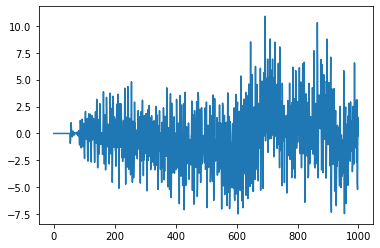

In [205]:
plt.plot(sound[:1000])

In [100]:
int(framerate)

44100

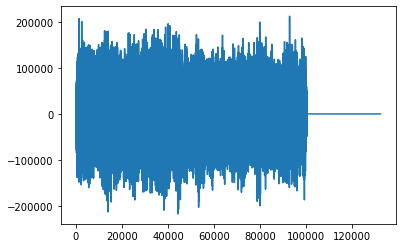

In [98]:
plt.plot(sound)

# testing on individual cells

In [85]:
framerate = 30000
tlen = 3 # sec
t = np.linspace(0, tlen, int(tlen*framerate), endpoint=True)
sp_len = int(framerate*(30/1000)) # play each spike sound for 30 ms
tone_t = np.arange(0, sp_len)

ind = 96
sps = spikeT[str(ind)]
    
n = 100 - int(ind)
freq = note_to_freq(int((int(n)+1)/2))

tone = np.sin(2*np.pi * freq * tone_t)

x = np.zeros(np.size(t))

for sp in sps:
    t_on = int(sp*framerate)
    t_off = int((sp*framerate)+sp_len)
    x[t_on:t_off] = tone

In [86]:
fname = '/Users/dmartins/Desktop/audio_test_96.wav'
wav_file = wave.open(fname, "w")

nchannels = 1#len(spikeT.keys())
sampwidth = 2
nframes = np.size(t)
comptype = "NONE"
compname = "not compressed"

wav_file.setparams((nchannels, sampwidth, int(framerate/4), nframes, comptype, compname))

s = x
# increase so it ranges from min:max of int16 dtype
s = np.array(s)*np.iinfo(np.int16).max
# write the audio frames to file
wav_file.writeframes(s.astype(np.int16))
# int(s*amp/2)))

wav_file.close()

/Users/dmartins/opt/anaconda3/envs/ephys0r/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [46]:
np.iinfo(np.int16).max

32767

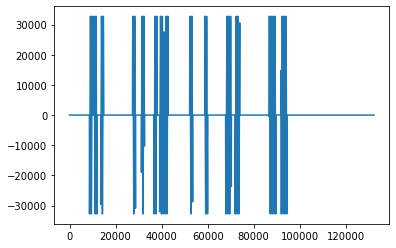

In [45]:
plt.plot()

In [48]:
rate = 44100
tlen = 3
t = np.linspace(0, tlen, int(tlen*rate), endpoint=True)
data = np.zeros([np.size(t), len(spikeT.keys())])

for ind, sps in spikeT.items():
    
    n = int(ind) + 20
    freq = note_to_freq(int((int(n)+1)/2))
    
    x = np.sin(2*np.pi * freq * t)
    # x = x * (2**15)
    
    for sp in sps:
        t_on = int(sp*rate)
        t_off = int((sp*rate)+1000)
    
        data[t_on:t_off,int(ind)] = x[t_on:t_off]

savepath = '/Users/dmartins/Desktop/audio_test_1.wav'
write(savepath, int(rate/4), data)

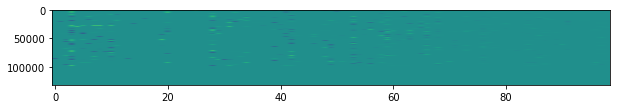

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(data, aspect=0.0001)

(2000.0, 3000.0)

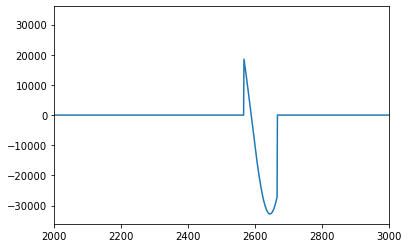

In [30]:
plt.plot(data[:,50]*(2**15))
plt.xlim([2000,3000])

In [12]:
data.shape

(132300, 99)

In [11]:
x.shape

(132300,)

In [25]:
int(sp*rate)

89320

In [26]:
int((sp*rate)+30)

89350

In [15]:
32767 *2 +1

65535

(0.0, 100.0)

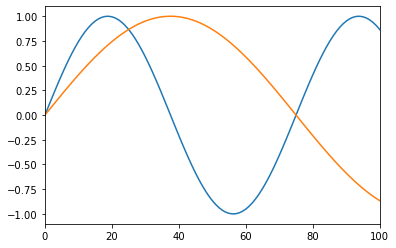

In [7]:
f = 400
rate = 30000
tlen = 3
t = np.linspace(0, tlen, int(tlen*rate), endpoint=True)
plt.plot(np.sin(2*np.pi * 400 * t))
plt.plot(np.sin(2*np.pi * 400 * t))
plt.xlim([0,100])

In [122]:
type(freqrange

numpy.ndarray